In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [482]:
file = pd.read_csv('/home/piyush/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv',header=0)
file.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [483]:
file = file.dropna()
print(file.shape)

(1470, 35)


In [484]:
file['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [485]:
file['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [486]:
file['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

# Data Exploration

In [487]:
file['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

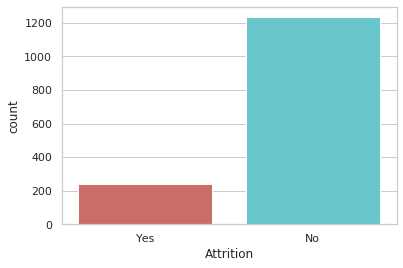

In [488]:
sns.countplot(x='Attrition',data=file,palette='hls')
plt.show()


In [489]:
file.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [490]:
X = file.iloc[:,[0] + list(range(2,35))].values
y = file.iloc[:,1].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
X[:,3] = labelencoder_X_1.fit_transform(X[:,3])
X[:,6] = labelencoder_X_1.fit_transform(X[:,6])
X[:,10] = labelencoder_X_1.fit_transform(X[:,10])
X[:,14] = labelencoder_X_1.fit_transform(X[:,14])
X[:,16] = labelencoder_X_1.fit_transform(X[:,16])
X[:,20] = labelencoder_X_1.fit_transform(X[:,20])
X[:,21] = labelencoder_X_1.fit_transform(X[:,21])
y = labelencoder_X_1.fit_transform(y)

In [491]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [492]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))

X_resampled.shape,y_resampled.shape

((2466, 34), (2466,))

In [493]:
X.shape,y.shape

((1470, 34), (1470,))

In [494]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size = 0.3, random_state = 100)

In [495]:
from numpy import loadtxt
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [496]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [497]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [498]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.30%


AUC: 0.922


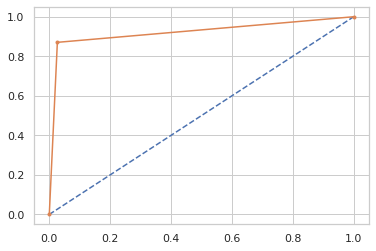

In [499]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [500]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       377
           1       0.97      0.87      0.92       363

    accuracy                           0.92       740
   macro avg       0.93      0.92      0.92       740
weighted avg       0.93      0.92      0.92       740

